# Recommendation
Author: Ruben Schild<br>
Student number: 650580<br>
Date: 31-5-2022

For this notebook to work you must have installed the following packages (usually via pip install *packageName*:
* numpy
* pandas
* **\<add other packages\>**

From these we will need the following libraries:

In [1]:
# pandas as pd
try:
    import pandas as pd
    print('Pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('Pandas was not installed, installed and imported')
    
# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')    

Pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported


# 1. The Item-Based Recommender

We are going to build an item-based recommender for books. In this recommender we could for example get a recommendation for a few books, based on a book we liked.

To begin we'll need to load some data.

In [2]:
# enter code to load your example data file(s)
books = pd.read_csv('../data/books.csv', on_bad_lines='skip', sep=';', encoding='latin-1', low_memory=False)
book_ratings = pd.read_csv('../data/book-ratings.csv', on_bad_lines='skip', sep=';', encoding='latin-1', low_memory=False)


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Eventually we want to merge the 2 datasets together. For that we do not need every colum in the dataset.    

In [17]:
books_df = books[['ISBN', 'Book-Title']]
books_df.head()

,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi


**<span >\<explain a bit about the data file(s), if you have multiple and need to merge them, use the code cell below></span>**<br>
In my case I have 2 datasets about books. books.csv are just the books. And book-ratings.csv are all the books that are rated by users. <br>
Because we need the rating and the booknames in 1 dataset, we are going to merge the 2 datasets:

In [18]:
# Optional depending on your dataset, enter code to select appropriate columns, and merge the files.
book_ratings_df = pd.merge(books_df, book_ratings, on='ISBN')
book_ratings_df


,ISBN,Book-Title,User-ID,Book-Rating
0,0195153448,Classical Mythology,2,0
1,0002005018,Clara Callan,8,5
2,0002005018,Clara Callan,11400,0
3,0002005018,Clara Callan,11676,8
4,0002005018,Clara Callan,41385,0
...,...,...,...,...
1031131,0440400988,There's a Bat in Bunk Five,276463,7
1031132,0525447644,From One to One Hundred,276579,4
1031133,006008667X,Lily Dale : The True Story of the Town that Ta...,276680,0
1031134,0192126040,Republic (World's Classics),276680,0


We need one row per user, and his/her scores for each book. We can do this by creating a pivot table.

## Note
I am using a subset of the books dataframe, because making a pivot table for ~300.000 books AND their ratings, generates an error that pandas has not yet resolved: https://github.com/pandas-dev/pandas/issues/10582 

In [89]:
# code to create pivot table
# Make a subset of the books dataset and merge it again
books_ss = books_df[0:5000]
book_ratings_df_ss = pd.merge(books_ss, book_ratings, on='ISBN')

book_matrix = book_ratings_df_ss.pivot_table(
    index='User-ID', columns='ISBN', values='Book-Rating')
book_matrix.head()

ISBN,0002005018,0002740230,0006276199,000636988X,0006476333,000649840X,0006513409,0006550789,0007100221,0007101953,...,9582700319,9679787834,9681500555,9681500601,9681905202,9721013412,9722110195,9724119378,9972847012,9997522052
User-ID,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We also need to take the counts into consideration so lets keep those into their own dataframe, together with the average score:

In [144]:
# code to make a dataframe with the unique objects, their average score and the number of scores
ratings = pd.DataFrame(book_ratings_df_ss.groupby('ISBN')['Book-Rating'].mean())
ratings['Number of Ratings'] = book_ratings_df_ss.groupby('ISBN')['Book-Rating'].count()
ratings['Book-Title'] = book_ratings_df_ss.groupby('ISBN')['Book-Title']
ratings.sort_values(by=['Number of Ratings']).head()


,Book-Rating,Number of Ratings,Book-Title
ISBN,,,
0440862809,0.0,1,"(0440862809, [Teenage Mutant Ninja Turtles: Le..."
0850315336,6.0,1,"(0850315336, [Nothingmas Day])"
0851123554,0.0,1,"(0851123554, [The Guinness book of aircraft: R..."
0851707777,9.0,1,"(0851707777, [Metropolis (Bfi Film Classics, 5..."
0855030224,0.0,1,"(0855030224, [An ABC for You and Me])"


To decide on a cut-off point as minimum number of scores to be eligable we can plot the number of scores in a histogram:

<AxesSubplot:>

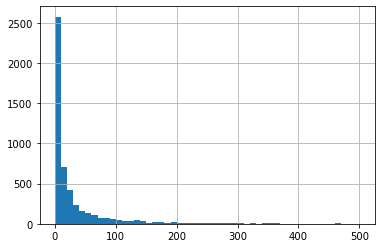

In [145]:
# code to generate the histogram
ratings['Number of Ratings'].hist(bins=50, range=(0,500))

From the histogram we can see that around 50 there are no more high reductions. Therefore we will use 50 as minimum number of ratings.

Finally we can create the code to perform a recommendation. First we can select one particular book

In [146]:
# code to select one field
book = book_matrix['0002005018']

In [93]:
# Print the name of the book just to know the name
books_ss[books_ss['ISBN'] == '0002005018']

,ISBN,Book-Title
1,0002005018,Clara Callan


And then to find the recommendation based on the correlations.

In [150]:
# code to create the recommendation
my_cors = book_matrix.corrwith(book).sort_values(ascending=False)

# and as a dataframe
corr_df = pd.DataFrame(my_cors, columns=['Correlation'])
corr_df.dropna(inplace=True)
corr_df = corr_df.sort_values('Correlation', ascending=False)
corr_df = corr_df.merge(ratings[['Number of Ratings', 'Book-Title']], on='ISBN')
# set number of ratings higher than 50 because of the results from the histogram
corr_df[corr_df['Number of Ratings']>=50].head()

g:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
g:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,Number of Ratings,Book-Title
ISBN,,,
1592400876,1.0,120,"(1592400876, [Eats, Shoots &amp; Leaves: The Z..."
0345384466,1.0,243,"(0345384466, [The Witching Hour (Lives of the ..."
0380718332,1.0,184,"(0380718332, [All That Remains (Kay Scarpetta ..."
0440221471,1.0,419,"(0440221471, [The Runaway Jury, The Runaway Ju..."
0393317552,1.0,67,"(0393317552, [Guns, Germs, and Steel: The Fate..."


To get a better understanding what these ISBN's are we are printing the name of them:

**<span>\<interpret the result></span>**<br>

Based on the given book, we got a few books that were recommended to us based on the correlations. The higher the correlation, the better the recommendation

It might be nice to have one simple function that could do all the work for us. It should have as input parameter a field and then returns the recommendation:

In [153]:
# code for a python function
def recommend_books(ISBN):
    # get the book
    b = book_matrix[ISBN]
    # make a correlation for it
    my_cors = book_matrix.corrwith(b).sort_values(ascending=False)
    # convert to a dataframe
    recommencation = pd.DataFrame(my_cors, columns=['Correlation'])
    recommencation.dropna(inplace=True)
    recommencation = recommencation.sort_values('Correlation', ascending=False)
    recommencation = recommencation.merge(ratings[['Number of Ratings', 'Book-Title']], on='ISBN')
    # set number of ratings higher than 50 because of the results from the histogram
    recommencation = recommencation[recommencation['Number of Ratings'] >= 50]

    return recommencation


Lets test the function:

In [154]:
# code to test the function
recommendations = recommend_books('0380718332')
recommendations.head()


g:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
g:\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,Number of Ratings,Book-Title
ISBN,,,
0345446860,1.0,131,"(0345446860, [Back When We Were Grownups : A N..."
0671027387,1.0,247,"(0671027387, [Deception Point, Deception Point..."
0312979479,1.0,72,"(0312979479, [And Then There Were None : A Nov..."
0380718332,1.0,184,"(0380718332, [All That Remains (Kay Scarpetta ..."
0767902513,1.0,56,"(0767902513, [A Walk in the Woods: Rediscoveri..."


<font size="5"><center>-----Chapters 1 is required to be fully completed to get a 60, the next few chapters will give a +10 for each chapter.<br> 
    However no template is available for these chapters. You will have to create it yourself.
    ----</center></font>

# 2. Negative correlations

The recommenders so far used, are looking at what if I give a high rating for this, what do you then recommend me. But how about if I give a low rating for something, what would you then recommend me?

# 3. Content Based

Add a chapter showing how a basic content based recommender might work. A starting point for this might be https://www.datacamp.com/community/tutorials/recommender-systems-python (at about 1/3 of the page it starts explaining this in the section called ‘Content based’.

# 4. User Based

Add a chapter showing how a basic user based recommender might work. A starting point for this might be https://realpython.com/build-recommendation-engine-collaborative-filtering/

# 5. Combination

Combine two or more recommendation techniques to get an even better recommendation